In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('KITTI.csv')
data = data.drop('Unnamed: 0', 1)
#data['File_Path'] = './VOCdevkit2007/VOC2007/JPEGImages/' + data['Frame']
#data = data[(data['label'] == 0)].reset_index()
print(data.head())

        Frame  x_center  y_center     w      h  truncated  labels  \
0  006839.png     472.0     301.0  44.0  118.0        0.0     2.0   
1  006839.png     145.0     365.0  87.0   92.0        0.0     0.0   
2  006528.png     210.0     385.0  72.0  224.0        0.0     5.0   
3  006528.png     247.0     368.0  56.0  172.0        0.0     5.0   
4  006528.png     395.0     316.0  77.0  126.0        0.0     1.0   

                              FileName  
0  ./KITTI/training/image_2/006839.png  
1  ./KITTI/training/image_2/006839.png  
2  ./KITTI/training/image_2/006528.png  
3  ./KITTI/training/image_2/006528.png  
4  ./KITTI/training/image_2/006528.png  


    index       Frame  x_center  y_center      w      h  truncated  labels  \
0   46119  005488.png     901.0     353.0  117.0  205.0       0.36     0.0   
1   46120  005488.png     846.0     345.0  158.0  147.0       0.00     0.0   
2   46121  005488.png     773.0     339.0  120.0  118.0       0.00     0.0   
3   46122  005488.png     829.0     475.0  261.0  326.0       0.93     0.0   
4   46123  005488.png     678.0     433.0  167.0  225.0       0.00     0.0   
5   46124  005488.png     227.0     463.0  239.0  309.0       0.00     0.0   
6   46125  005488.png     334.0     360.0  127.0  208.0       0.00     1.0   
7   46126  005488.png     732.0     328.0  100.0   99.0       0.00     0.0   
8   46127  005488.png     672.0     311.0  104.0   97.0       0.00     0.0   
9   46128  005488.png     670.0     307.0  128.0   96.0       0.00     1.0   
10  46129  005488.png     384.0     355.0   68.0  119.0       0.00     0.0   
11  46130  005488.png     407.0     339.0   55.0   87.0       0.

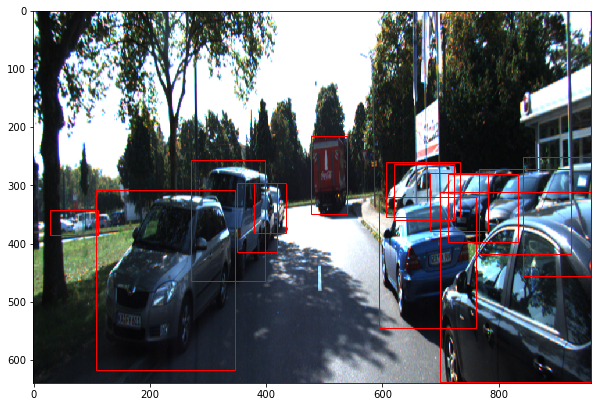

In [3]:
import batch_generate
i_line = np.random.randint(len(data))
name_str, img, bb_boxes = batch_generate.get_img_by_name(data, i_line, size = (960, 640))
print(bb_boxes)
gta = batch_generate.bbox_transform(bb_boxes)
print(gta)
plt.figure(figsize=(10,10))
plt.imshow(img)
currentAxis = plt.gca()
for i in range(len(gta)):
    currentAxis.add_patch(plt.Rectangle((gta[i,0], gta[i,1]), gta[i,2]-gta[i,0], gta[i,3]-gta[i,1], fill=False, edgecolor= 'r', linewidth=1))

In [4]:
#data analysis
#total imgs
total_num = pd.unique(data['Frame'])
print(len(total_num))

7481


In [5]:
#cls
print(data.describe())

           x_center      y_center             w             h     truncated  \
count  51865.000000  51865.000000  51865.000000  51865.000000  51865.000000   
mean     439.996799    348.311193     70.450130    107.661660     -0.159973   
std      201.869345     50.176560     66.972274     95.205568      0.485140   
min        3.000000    168.000000      0.000000      3.000000     -1.000000   
25%      316.000000    315.000000     26.000000     44.000000      0.000000   
50%      438.000000    335.000000     46.000000     73.000000      0.000000   
75%      554.000000    366.000000     90.000000    135.000000      0.000000   
max      959.000000    617.000000    548.000000    638.000000      1.000000   

             labels  
count  51865.000000  
mean       2.464533  
std        3.303008  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        5.000000  
max        8.000000  


[28742, 2914, 1094, 4487, 222, 1627, 511, 973, 11295]


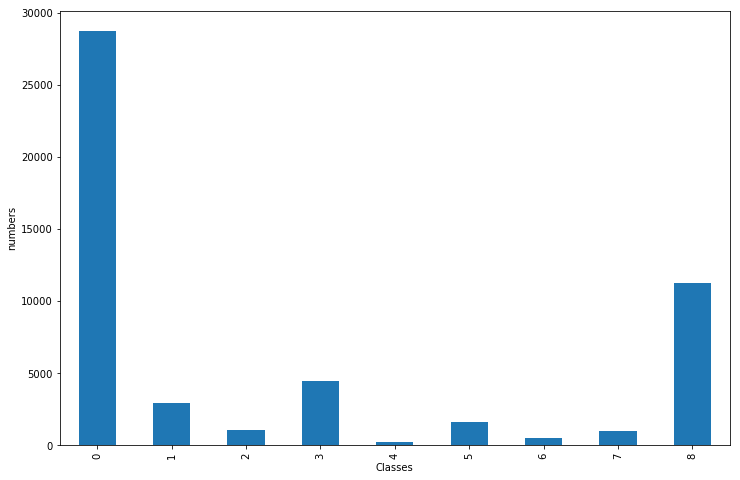

In [6]:
#total objects: 51865
#each cls[0,1,2,3,4,5,6,7,8]
cls = {'Car','Van','Truck','Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc', 'DontCare'}
classes = []
df = data
for i in range(9):
    df_ = df[df['labels'] == i]
    #print(len(df_))
    classes.append(len(df_))
print(classes)
#plt
_nums_ = pd.Series.from_array(classes)
plt.figure(figsize = (12,8))
fig = _nums_.plot(kind = 'bar')
fig.set_ylabel("numbers")
fig.set_xlabel("Classes")
plt.show()

In [7]:
df['area'] = df['w'] * df['h']
print(df.head())

        Frame  x_center  y_center     w      h  truncated  labels  \
0  006839.png     472.0     301.0  44.0  118.0        0.0     2.0   
1  006839.png     145.0     365.0  87.0   92.0        0.0     0.0   
2  006528.png     210.0     385.0  72.0  224.0        0.0     5.0   
3  006528.png     247.0     368.0  56.0  172.0        0.0     5.0   
4  006528.png     395.0     316.0  77.0  126.0        0.0     1.0   

                              FileName     area  
0  ./KITTI/training/image_2/006839.png   5192.0  
1  ./KITTI/training/image_2/006839.png   8004.0  
2  ./KITTI/training/image_2/006528.png  16128.0  
3  ./KITTI/training/image_2/006528.png   9632.0  
4  ./KITTI/training/image_2/006528.png   9702.0  


[8490, 10191, 10061, 835, 1017, 1062, 300, 464, 330, 1617, 1508, 1362, 10, 104, 108, 670, 581, 376, 71, 173, 267, 312, 361, 300, 8814, 1928, 553]


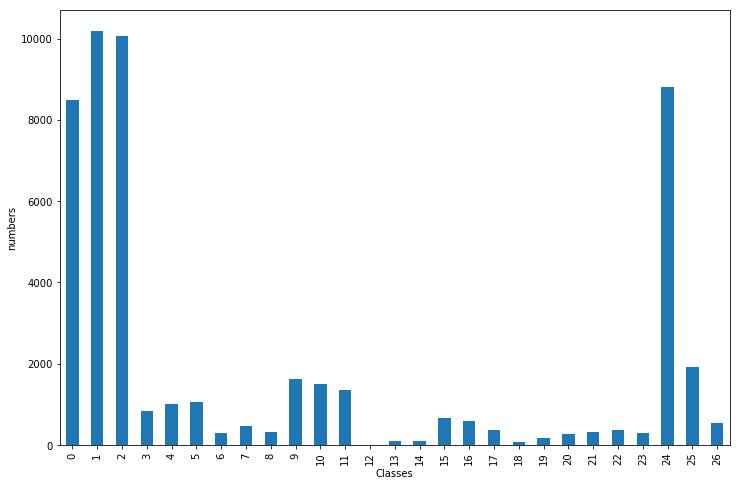

In [9]:
classes = []
df = data
for i in range(9):
    df_ = df[df['labels'] == i]
    small_obj = df_[df_['area'] <= 2304]
    df__ = df_[df_['area'] > 2304]
    regular_obj = df__[df__['area'] <= 9216]
    large_obj = df_[df_['area'] > 9216]
    #print(len(df_))
    classes.append(len(small_obj))
    classes.append(len(regular_obj))
    classes.append(len(large_obj))
print(classes)
#plt
_nums_ = pd.Series.from_array(classes)
plt.figure(figsize = (12,8))
fig = _nums_.plot(kind = 'bar')
fig.set_ylabel("numbers")
fig.set_xlabel("Classes")
plt.show()

[11, 11, 250, 2, 4, 39, 3, 1, 27, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 28, 0, 2, 8, 0, 0, 0]


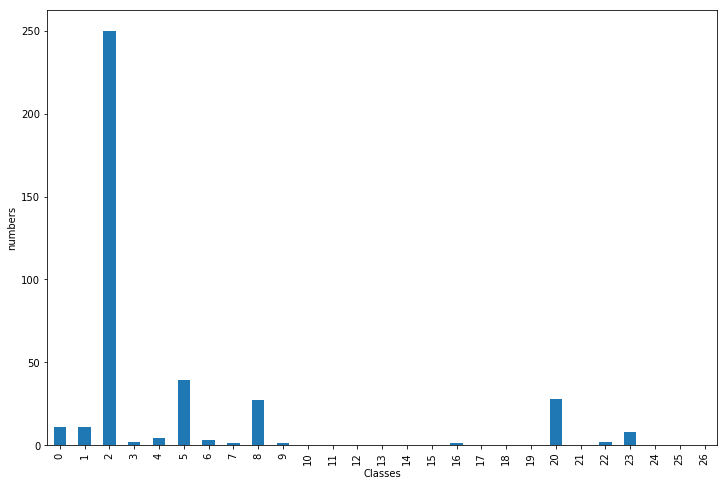

In [10]:
#if conside truncated type
classes = []
df = data[data['truncated'] == 1]
for i in range(9):
    df_ = df[df['labels'] == i]
    small_obj = df_[df_['area'] <= 2304]
    df__ = df_[df_['area'] > 2304]
    regular_obj = df__[df__['area'] <= 9216]
    large_obj = df_[df_['area'] > 9216]
    #print(len(df_))
    classes.append(len(small_obj))
    classes.append(len(regular_obj))
    classes.append(len(large_obj))
print(classes)
#plt
_nums_ = pd.Series.from_array(classes)
plt.figure(figsize = (12,8))
fig = _nums_.plot(kind = 'bar')
fig.set_ylabel("numbers")
fig.set_xlabel("Classes")
plt.show()

[8422, 9728, 6525, 825, 960, 689, 296, 453, 223, 1612, 1478, 1024, 9, 99, 59, 667, 562, 264, 71, 173, 187, 307, 344, 202, 0, 0, 0]


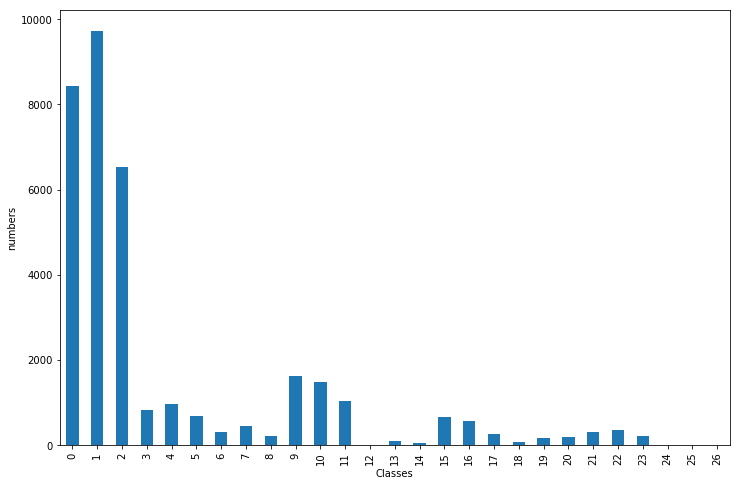

In [11]:
classes = []
df = data[data['truncated'] == 0]
for i in range(9):
    df_ = df[df['labels'] == i]
    small_obj = df_[df_['area'] <= 2304]
    df__ = df_[df_['area'] > 2304]
    regular_obj = df__[df__['area'] <= 9216]
    large_obj = df_[df_['area'] > 9216]
    #print(len(df_))
    classes.append(len(small_obj))
    classes.append(len(regular_obj))
    classes.append(len(large_obj))
print(classes)
#plt
_nums_ = pd.Series.from_array(classes)
plt.figure(figsize = (12,8))
fig = _nums_.plot(kind = 'bar')
fig.set_ylabel("numbers")
fig.set_xlabel("Classes")
plt.show()